In [2]:
import pandas as pd

# Load the models and brands mapping
mapping_df = pd.read_csv('car_models_and_brands.csv')

# Load the data from Data Scrapper Code
data_df = pd.read_csv('final_data (1).csv')

# Create a dictionary for mapping models to brands
model_to_brand = {}
for _, row in mapping_df.iterrows():
    brand = row['Brand']
    models = row['Model'].split('|')
    for model in models:
        model_to_brand[model] = brand

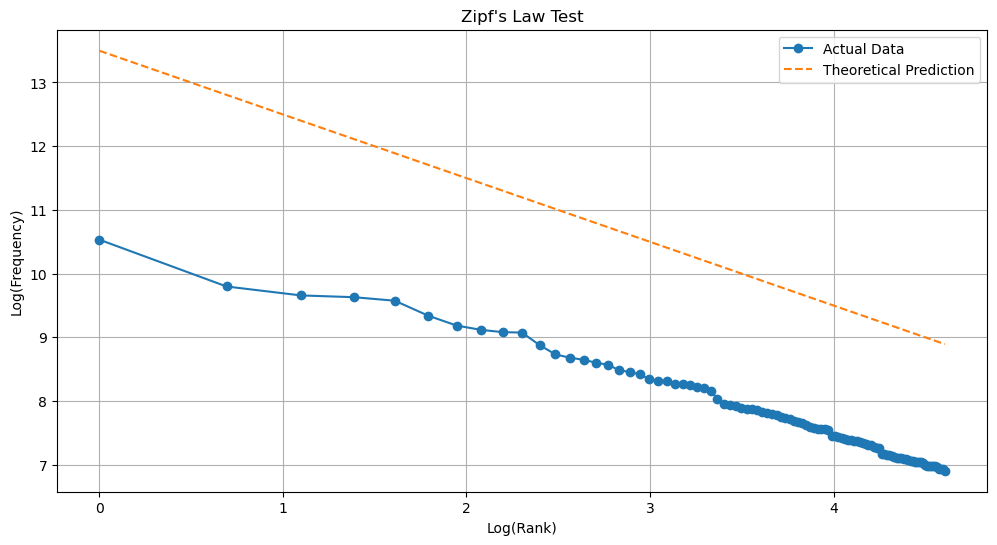

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the comment column
comments = data_df[data_df['Comment'].apply(lambda x: isinstance(x, str))]['Comment']

# Tokenize and preprocess the comments (remove punctuation and convert to lowercase)
def preprocesstext(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenize and convert to lowercase
    return words

# Tokenize and preprocess the comments
all_words = []
for comment in comments:
    words = preprocesstext(comment)
    all_words.extend(words)

# Calculate word frequencies
word_frequencies = pd.Series(all_words).value_counts()

# Rank words by frequency
ranks = np.arange(1, len(word_frequencies) + 1)

# Calculate the theoretical prediction for Zipf's Law
total_words = len(all_words)
theoretical_freq = total_words / ranks

# Plot the most common 100 words and the theoretical prediction
top_100_words = word_frequencies.head(100)
top_100_ranks = np.arange(1, 101)  # Adjust the ranks to match the top 100 words
plt.figure(figsize=(12, 6))
plt.plot(np.log(top_100_ranks), np.log(top_100_words.values), marker='o', label='Actual Data')
plt.plot(np.log(ranks[:100]), np.log(theoretical_freq[:100]), linestyle='--', label='Theoretical Prediction')
plt.title("Zipf's Law Test")
plt.xlabel("Log(Rank)")
plt.ylabel("Log(Frequency)")
plt.legend()
plt.grid(True)
plt.show()

In [62]:
top_100_words

the      37518
a        17989
to       15634
and      15209
i        14386
         ...  
been      1051
still     1032
over      1024
other     1024
years      998
Length: 100, dtype: int64

In [3]:
# Define the replacement for models to brand
import re

def replace_models_with_brands(text):
    if isinstance(text, str):  # Check if the value is a string
        words = re.split(r'[ ,]', text.lower())  # Split on space or comma
        for i in range(len(words)):
            if words[i] in model_to_brand:
                words[i] = model_to_brand[words[i]]
        return ' '.join(words)
    else:
        return text  # Return the original value for non-string (NaN) values

In [4]:
# Apply the replacement function to the relevant column in data_df
data_df['Comment'] = data_df['Comment'].apply(replace_models_with_brands)

# Save the modified data to B_modified.csv
data_df.to_csv('B_modified.csv', index=False)

In [5]:
# Load the models and brands mapping from A.csv
df = pd.read_csv('B_modified.csv')

In [6]:
# Create a new dataset with the "Comment" column
comment_dataset = df['Comment']

# Filter out non-string values from the "Comment" column
comment_dataset = df[df['Comment'].apply(lambda x: isinstance(x, str))]['Comment']

In [7]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download the stopwords dataset
nltk.download('stopwords')

# Load stopwords from NLTK
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Function to preprocess text
def preprocess_text(text):
    words = re.findall(r'\b\w+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

In [9]:
# Initialize a dictionary to store brand counts
brand_counts = {}
# Exclude specific brands
excluded_brands = ['car', 'seat', 'problem']
filtered_brands = set(list(brand for brand in model_to_brand.values() if brand not in excluded_brands))

In [54]:
# Iterate through the comments, replace models with brands, and count brand frequencies
brand_frequencies = {}
for comment in comment_dataset:
    words = preprocess_text(comment)
    mentioned_brands = set()
    for brand in filtered_brands:
        for word in words:
            if word in filtered_brands:
                mentioned_brands.add(word)
                break
    for brand in mentioned_brands:
        if brand in brand_frequencies:
             brand_frequencies[brand] += 1
        else:
            brand_frequencies[brand] = 1

In [55]:
# Identify the top 10 brands by frequency
top_brands = sorted(brand_frequencies.items(), key=lambda x: x[1], reverse=True)[:10]
top_brands

[('bmw', 1165),
 ('acura', 770),
 ('audi', 706),
 ('honda', 472),
 ('infiniti', 170),
 ('cadillac', 166),
 ('dodge', 145),
 ('toyota', 129),
 ('volkswagen', 124),
 ('sedan', 118)]